In [1]:
import torch
import pickle
from wdl.bregman import barycenter
import matplotlib.pyplot as plt
from utilities.simpleDistributions import simplexSample

In [4]:
height, width = 28, 28
maxsinkiters = 50
reg = 0.003
barySolver = barycenter(None, "conv", reg=reg, height=height, width=width, maxsinkiter=maxsinkiters)

with open(
        "noise0.0005.pkl",
        'rb') as f:
    data = pickle.load(f)

D = data["True D"][:, :3]
w = simplexSample(3)

X = barySolver(D, w)

noise = 5e-4
X += noise * torch.randn_like(X)
# make any negative entries small to avoid numerical errors (unsure of what the exact bug is
# happens during backward pass
X = torch.clip(X, min=1e-4)
X /= X.sum(0)

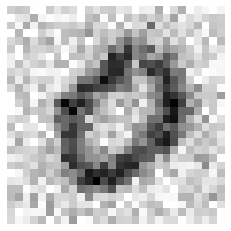

In [5]:
fig, ax = plt.subplots()
ax.imshow(X.view(28, 28), cmap="gray_r")
ax.axis("off")
fig.savefig("noisymnist.pdf")